In [2]:
# plotting codes for figures

# 1. 折线图

import matplotlib.pyplot as plt
import numpy as np

hyparams = np.array([3, 7, 10, 14])

# First All Weibo Then Twitter
input_s = """
3.50	6.62	2.80	16.11	3.21	23.73	3.32
3.54	6.68	2.84	16.14	3.25	23.79	3.36
3.50	6.61	2.80	16.17	3.21	23.92	3.32
3.49	6.69	2.79	16.24	3.2	23.95	3.31

21.97%	22.18%	8.68%	41.19%	9.57%	49.12%	9.69%
23.48%	22.25%	8.76%	40.87%	9.64%	49.22%	9.75%
22.44%	22.23%	8.73%	41.25%	9.61%	49.14%	9.72%
22.42%	22.21%	8.70%	41.05%	9.59%	49.07%	9.71%
"""

# transform input_s to map data
def transform_to_map(hyparams, input: str):
    data = {}
    names = ["weibo", "twitter"]
    metrics_names = ["MRR", "A@10", "MAP@10", "A@50", "MAP@50", "A@100", "MAP@100"]
    selected_indices = [2, 4, 6]
    # selected_indices = [0, 1, 3, 5]
    lines = input.split('\n')
    cnt = 0
    for line in lines:
        if len(line) == 0: continue
        name = names[int(cnt / len(hyparams))]
        cnt += 1

        if name not in data: data[name] = []
        metrics = line.split('\t')
        if metrics[0][-1] == '%':
            metrics = list(map(lambda x: float(x[:-1]), metrics))
        else:
            metrics = list(map(lambda x: float(x), metrics))
        data[name].append(metrics)

    data2 = {}
    for name, values in data.items():
        # if name == 'weibo': selected_indices = [0,2,4,6]
        data2[name] = {}
        for midx, mname in enumerate(metrics_names):
            if midx not in selected_indices: continue
            data2[name][mname] = [values[i][midx] for i in range(len(values))]
    
    return data2


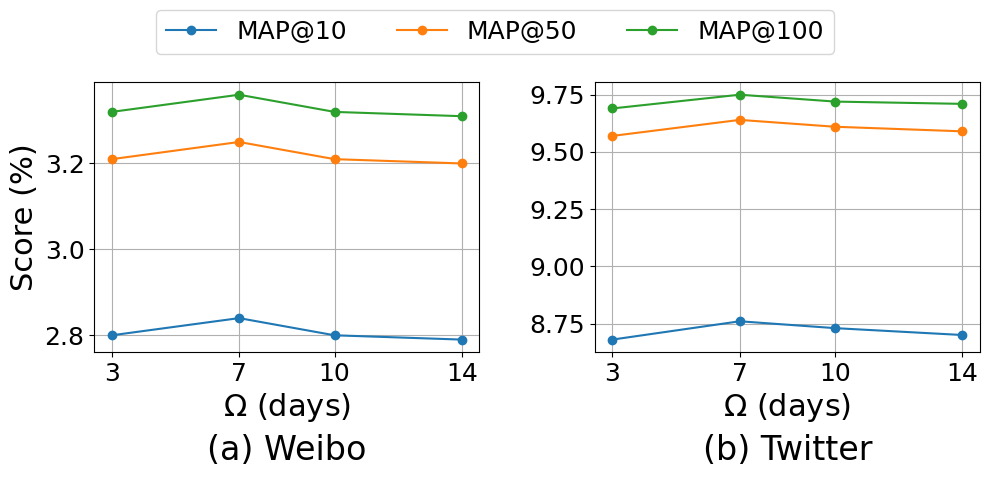

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# hp
label_size = 22
title_size = 24
legend_size = 18
num_size = 18

data2 = transform_to_map(hyparams, input_s)
for k, values in data2.items():
    ax = ax1 if k == 'weibo' else ax2
    for mname, mvalues in values.items():
        ax.plot(hyparams, mvalues, label=mname, marker='o')
    ax.set_xlabel('$\Omega$ (days)', fontsize=label_size)
    if k == 'weibo':
        ax.set_ylabel('Score (%)', fontsize=label_size)
    ax.grid(True)
    
    ax.set_xticks(hyparams)
    ax.tick_params(axis='x', labelsize=num_size)
    ax.tick_params(axis='y', labelsize=num_size)

lines, labels = ax1.get_legend_handles_labels()
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize=legend_size)

# 添加子图标题
ax1_title = ax1.set_title('(a) Weibo', y=-0.35, pad=-10, fontsize=title_size)
ax2_title = ax2.set_title('(b) Twitter', y=-0.35, pad=-10, fontsize=title_size)

# Overall title and layout
plt.tight_layout()
plt.subplots_adjust(top=0.88, wspace=0.3)
# plt.show()
plt.savefig('/remote-home/share/dmb_nas/wangzejian/window_size.png', dpi=300, bbox_inches='tight')


In [14]:
# 2. 色格图

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

hyparams1 = np.array([32, 16, 8]) # hu
hyparams2 = np.array([2, 4, 8]) # nh

# First All Weibo Then Twitter
input_s = """
3.36	6.54	2.66
3.31	6.52	2.65
3.54	6.68	2.84
3.26	6.48	2.6
3.46	6.63	2.76
3.41	6.56	2.69

22.17%	22.22%	8.71%
21.89%	22.18%	8.64%
23.48%	22.25%	8.76%
21.75%	21.06%	7.57%
22.26%	21.07%	7.62%
22.84%	21.10%	7.77%
"""

def transform_to_map2(hyparams_len, input: str):
    data = {}
    names = ["weibo", "twitter"]
    # metrics_names = ["MRR", "A@10", "MAP@10", "A@50", "MAP@50", "A@100", "MAP@100"]
    # metrics_names = ["mrr", "hits10", "map10", "hits50", "map50", "hits100", "map100"]
    metrics_names = ["mrr", "hits10", "map10",]
    selected_indices = [0, 1, 2]
    lines = input.split('\n')
    cnt = 0
    # print(len(hyparams))
    for line in lines:
        if len(line) == 0: continue
        name = names[int(cnt / hyparams_len)]
        cnt += 1

        if name not in data: data[name] = []
        metrics = line.split('\t')
        if metrics[0][-1] == '%':
            metrics = list(map(lambda x: float(x[:-1]), metrics))
        else:
            metrics = list(map(lambda x: float(x), metrics))
        data[name].append(metrics)

    data2 = {}
    for name, values in data.items():
        data2[name] = {}
        for midx, mname in enumerate(metrics_names):
            if midx not in selected_indices: continue
            data2[name][mname] = [values[i][midx] for i in range(len(values))]
    
    return data2

hyparams = [(hp1, hp2) for hp1 in hyparams1 for hp2 in hyparams2]
data2 = transform_to_map2(6, input_s)
data2

{'weibo': {'mrr': [3.36, 3.31, 3.54, 3.26, 3.46, 3.41],
  'hits10': [6.54, 6.52, 6.68, 6.48, 6.63, 6.56],
  'map10': [2.66, 2.65, 2.84, 2.6, 2.76, 2.69]},
 'twitter': {'mrr': [22.17, 21.89, 23.48, 21.75, 22.26, 22.84],
  'hits10': [22.22, 22.18, 22.25, 21.06, 21.07, 21.1],
  'map10': [8.71, 8.64, 8.76, 7.57, 7.62, 7.77]}}

In [15]:
num_size = 22
label_size = 26
annot_size = 22
legend_size = 22

for k, values in data2.items():
    if k == 'weibo': continue
    for mname, mvalues in values.items():
        print(values)
        cnt = 0
        data = []
        for fill_idx in range(1, len(hyparams1)+1):
            line = mvalues[cnt: cnt+fill_idx] + [0] * (len(hyparams2) - fill_idx)
            cnt += fill_idx
            data.append(line)
        print(data)

        mask = np.triu(np.ones_like(data, dtype=bool), 1)
        ax = sns.heatmap(data, annot=True, fmt=".2f", cmap="YlOrRd", xticklabels=hyparams2, yticklabels=hyparams1, mask=mask, annot_kws={"size": annot_size})

        ax.set_xlabel('Number of Heads', fontsize=label_size)
        ax.set_ylabel('Number of Neurons', fontsize=label_size)
        # plt.title('(a) MRR', fontsize=12, pad=20)

        ax.tick_params(axis='x', labelsize=num_size)
        ax.tick_params(axis='y', labelsize=num_size)

        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=legend_size)  # 调整颜色条刻度标签字体大小

        # 将纵轴的标签文字横过来
        # ax.yaxis.set_label_position("right")
        # ax.yaxis.set_label_coords(1.05, 0.5)
        # ax.yaxis.label.set_rotation(0)

        plt.savefig('/remote-home/share/dmb_nas/wangzejian/nhead-{ds}-{m}.png'.format(
                ds=k, m=mname
            ), dpi=300, bbox_inches='tight')

        plt.clf()
    break


{'mrr': [22.17, 21.89, 23.48, 21.75, 22.26, 22.84], 'hits10': [22.22, 22.18, 22.25, 21.06, 21.07, 21.1], 'map10': [8.71, 8.64, 8.76, 7.57, 7.62, 7.77]}
[[22.17, 0, 0], [21.89, 23.48, 0], [21.75, 22.26, 22.84]]
{'mrr': [22.17, 21.89, 23.48, 21.75, 22.26, 22.84], 'hits10': [22.22, 22.18, 22.25, 21.06, 21.07, 21.1], 'map10': [8.71, 8.64, 8.76, 7.57, 7.62, 7.77]}
[[22.22, 0, 0], [22.18, 22.25, 0], [21.06, 21.07, 21.1]]
{'mrr': [22.17, 21.89, 23.48, 21.75, 22.26, 22.84], 'hits10': [22.22, 22.18, 22.25, 21.06, 21.07, 21.1], 'map10': [8.71, 8.64, 8.76, 7.57, 7.62, 7.77]}
[[8.71, 0, 0], [8.64, 8.76, 0], [7.57, 7.62, 7.77]]


<Figure size 640x480 with 0 Axes>